In [ ]:
### 거리 기반 알고리즘은 꼭 scaling이 필요하다. 

# 0. 모듈 불러오기

In [ ]:
# 데이터 구성 : Series, DataFrame
import pandas as pd

# 행렬 연산 
import numpy as np

# 데이터 시각화 
import matplotlib
import matplotlib.pyplot as plt

# Scale 변환 : 평균, 표준편차 기준 
from sklearn.preprocessing import StandardScaler

# linkage : 계층형 군집분석, dendrogram: 계층구조 나무, cluster: linkage로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster 

# k means 군집분석, DBSCAN 군집분석
from sklearn.cluster import KMeans, DBSCAN

# 1. 데이터 

In [8]:
df_raw=pd.read_csv("/home/piai/Downloads/데이터_1/직무능력평가.csv", engine='python')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [9]:
scaler=StandardScaler()
df_raw_scaled=scaler.fit_transform(df_raw) # 배열로 바뀜 
df_raw_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [10]:
# 목표변수 
df_raw_y=df_raw_scaled[:,0]

# 설명변수
df_raw_x=df_raw_scaled[:,1::]

Text(0, 0.5, 'sample index')

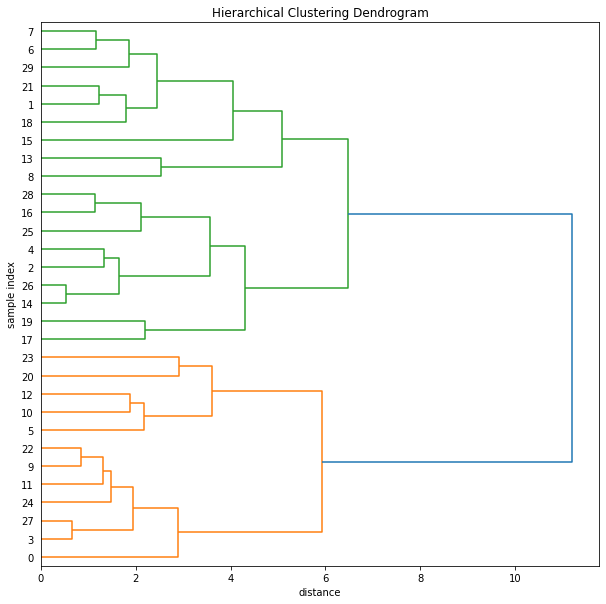

In [17]:
# 연결:ward , 거리계산 : Euclidean
Z_ward=linkage(df_raw_x, method="ward", metric="euclidean")

# 연결:avaerage , 거리계산 : Euclidean
Z_avaerage=linkage(df_raw_x, method="average", metric="euclidean")

# 연결:avaerage , 거리계산 : minkowski
Z_Minkowski=linkage(df_raw_x, method="average", metric="minkowski") #옵션에 따라 군집이 다름 

# 덴드로그램 [연결 : ward, 거리계산 : Euclidean]
plt.figure(figsize=(10,10))
ax=plt.subplot(111)

# DataFrame 변경 : Z_ward, Z_avaerage, Z_minkowski
dendrogram(Z_ward, leaf_font_size=10, orientation="right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('distance')
plt.ylabel('sample index')

In [ ]:
# 연결:ward , 거리계산 : Euclidean
Z_ward=linkage(df_raw_x, method="ward", metric="euclidean")

# 연결:avaerage , 거리계산 : Euclidean
Z_avaerage=linkage(df_raw_x, method="average", metric="euclidean")

# 연결:avaerage , 거리계산 : minkowski
Z_Minkowski=linkage(df_raw_x, method="average", metric="minkowski")

# 덴드로그램 [연결 : ward, 거리계산 : Euclidean]
plt.figure(figsize=(10,10))
ax=plt.subplot(111)

# DataFrame 변경 : Z_ward, Z_avaerage, Z_minkowski
dendrogram(Z_ward, leaf_font_size=10, orientation="top")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('distance')
plt.ylabel('sample index')

Text(0, 0.5, 'sample index')

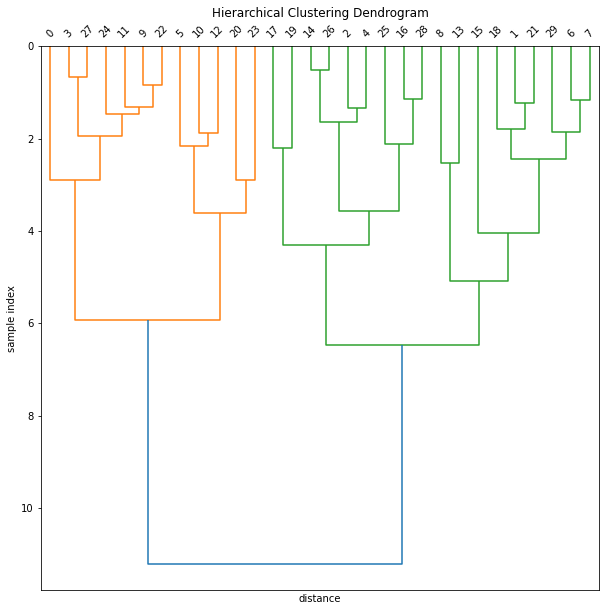

In [19]:
# 연결:ward , 거리계산 : Euclidean
Z_ward=linkage(df_raw_x, method="ward", metric="euclidean")

# 연결:avaerage , 거리계산 : Euclidean
Z_avaerage=linkage(df_raw_x, method="average", metric="euclidean")

# 연결:avaerage , 거리계산 : minkowski
Z_Minkowski=linkage(df_raw_x, method="average", metric="minkowski")

# 덴드로그램 [연결 : ward, 거리계산 : Euclidean]
plt.figure(figsize=(10,10))
ax=plt.subplot(111)

# DataFrame 변경 : Z_ward, Z_avaerage, Z_minkowski
dendrogram(Z_ward, leaf_font_size=10, orientation="bottom")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('distance')
plt.ylabel('sample index')

In [16]:
Z_ward

array([[14.        , 26.        ,  0.52156235,  2.        ],
       [ 3.        , 27.        ,  0.65700712,  2.        ],
       [ 9.        , 22.        ,  0.84734214,  2.        ],
       [16.        , 28.        ,  1.13863458,  2.        ],
       [ 6.        ,  7.        ,  1.17063718,  2.        ],
       [ 1.        , 21.        ,  1.22298201,  2.        ],
       [11.        , 32.        ,  1.31728974,  3.        ],
       [ 2.        ,  4.        ,  1.33423955,  2.        ],
       [24.        , 36.        ,  1.47235046,  4.        ],
       [30.        , 37.        ,  1.65014418,  4.        ],
       [18.        , 35.        ,  1.78970024,  3.        ],
       [29.        , 34.        ,  1.8539993 ,  3.        ],
       [10.        , 12.        ,  1.88477465,  2.        ],
       [31.        , 38.        ,  1.94570646,  6.        ],
       [25.        , 33.        ,  2.11914806,  3.        ],
       [ 5.        , 42.        ,  2.16582648,  3.        ],
       [17.        , 19.

In [ ]:
# linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_hierarchical=fcluster(Z=Z_ward, t=5, )